In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re #for reformatting

In [234]:
url="http://frrm.raceresults.space/2018/2018_HogHustle_OA.htm"
html=urlopen(url) 

In [235]:
BS = BeautifulSoup(html) #import url info to BS

In [236]:
title = BS.title
print(title.text)

Dunedin Hog Hustle-2018 5k


In [237]:
links = BS.find_all('a', href=True)
for link in links:
    print(link.get("href"))

http://www.floridaroadrace.com


In [238]:
data = []
allrows = BS.find_all("tr") #data element
for row in allrows:
    row_list = row.find_all("td") #data cells
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
print(data)

[['5k'], ['Place', 'Name', 'City', 'Bib No', 'Age', 'Gender', 'Age Group', 'Chip Time', 'Gun Time', 'Pace'], ['1', 'Jason Ford', 'Clearwater  FL', '1506', '32', 'M', '1 Top Fin', '    17:41.0', '17:41.0', '5:42/M'], ['2', 'Mac Wright', 'Lithia  FL', '1391', '15', 'M', '1 15-19', '    18:15.9', '18:18.9', '5:54/M'], ['3', 'Blair Burnett', 'Tampa  FL', '1488', '49', 'M', '1 Top Fin', '    18:34.2', '18:35.3', '6:00/M'], ['4', 'Olen Dalton', '', '1457', '25', 'M', '1 25-29', '    19:04.4', '19:06.2', '6:10/M'], ['5', 'Jean-Luc Zulalf', '', '1083', '31', 'M', '1 30-34', '    20:23.0', '20:23.0', '6:35/M'], ['6', 'Kai Kline', 'Dunedin  FL', '1385', '34', 'M', '2 30-34', '    20:25.7', '20:27.8', '6:36/M'], ['7', 'Chris Deleonardo', 'Sarasota  FL', '952', '35', 'M', '1 35-39', '    20:27.0', '20:27.3', '6:36/M'], ['8', 'Jason Pursel', '', '1487', '32', 'M', '3 30-34', '    20:34.5', '20:36.6', '6:39/M'], ['9', 'Bruce Haselden', 'St. Petersburg  FL', '1358', '55', 'M', '1 55-59', '    20:45.3

In [404]:
df = pd.DataFrame(data)
print(df)

         0                  1                   2       3     4       5  \
0       5k               None                None    None  None    None   
1    Place               Name                City  Bib No   Age  Gender   
2        1         Jason Ford      Clearwater  FL    1506    32       M   
3        2         Mac Wright          Lithia  FL    1391    15       M   
4        3      Blair Burnett           Tampa  FL    1488    49       M   
..     ...                ...                 ...     ...   ...     ...   
341    334        Laura Klein      Clearwater  FL    1003    32       F   
342    335      Deborah Kynes         Dunedin  FL    1007    67       F   
343    336     Gregory Martin         Dunedin  FL    1018    70       M   
344    337    Sanja Jovasevic  St. Petersburg  FL     998    33       F   
345    338  Tatjana Jovasevic  St. Petersburg  FL     999    38       F   

             6            7         8        9  
0         None         None      None     None  
1

In [405]:
df2 = df[[(4),(9)]]
df2 = df.dropna(how='any')
print(df2[[(4),(9)]].tail())
print(df2[[(4),(9)]].head(6,))

      4        9
341  32  19:09/M
342  67  19:11/M
343  70  19:12/M
344  33  19:05/M
345  38  19:06/M
     4       9
1  Age    Pace
2   32  5:42/M
3   15  5:54/M
4   49  6:00/M
5   25  6:10/M
6   31  6:35/M


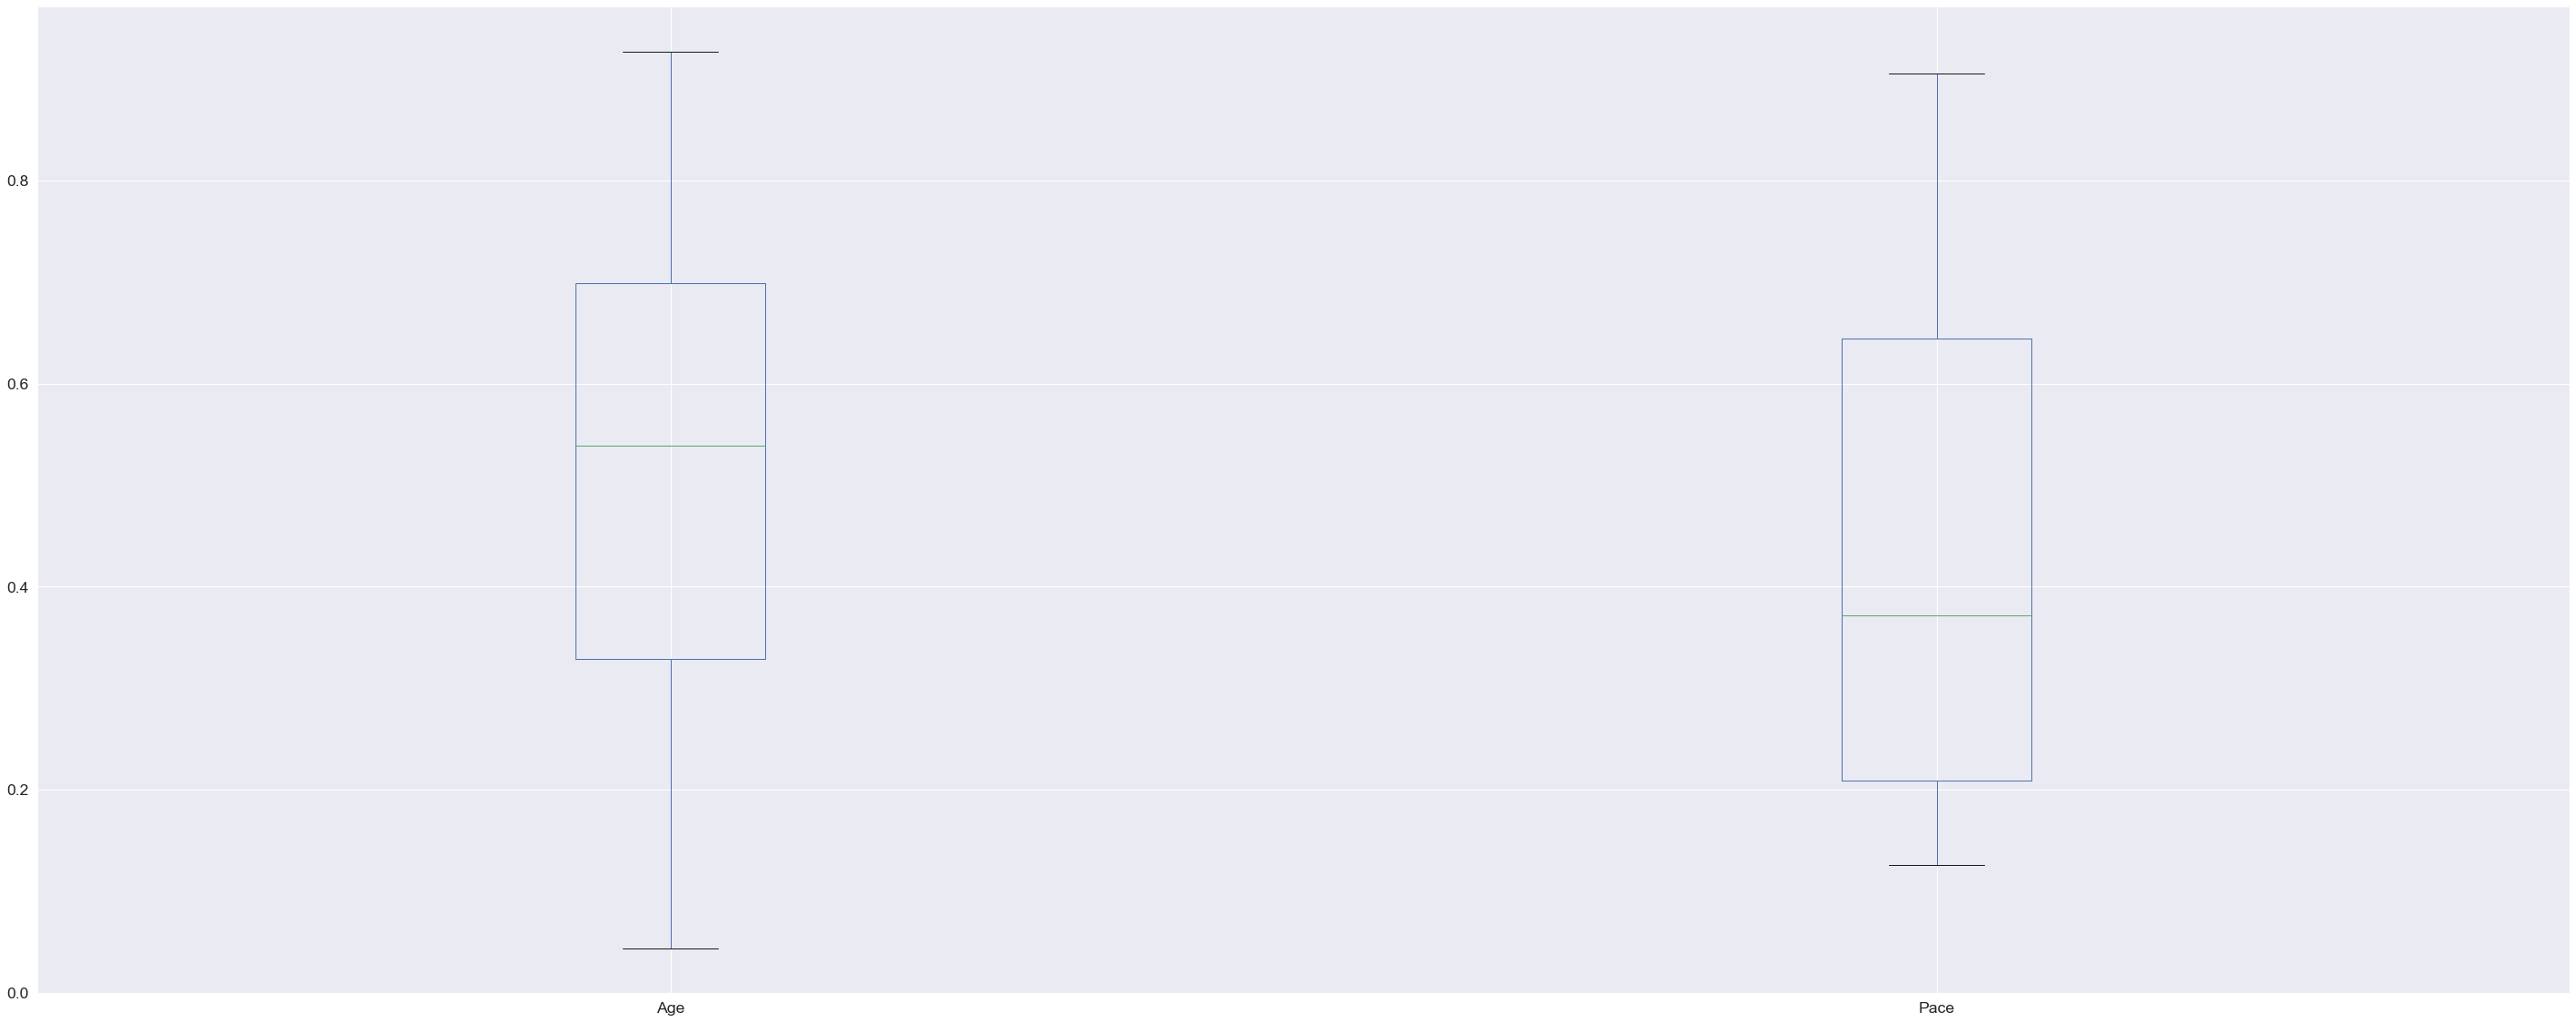

In [407]:
np.random.seed(70)
df = pd.DataFrame(data = np.random.random(size=(10,2)), columns = ['Age','Pace'])
df.plot(kind='box')
plt.show()